In [19]:
import seaborn as sns
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

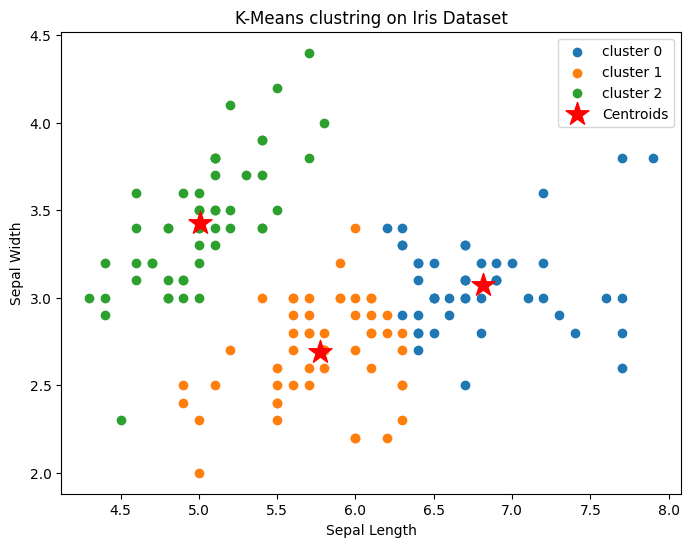

In [20]:
# Load dataset
data = sns.load_dataset("iris")

# Extracting features for clustring
X = data[['sepal_length', 'sepal_width']]

# K-Mean clustring
Kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster']= Kmeans.fit_predict(X)


# Visualization of cluster
plt.figure(figsize=(8,6))
for cluster in range(3):
    cluster_data = data[data['Cluster']== cluster]
    plt.scatter(cluster_data['sepal_length'],cluster_data['sepal_width'], label= f'cluster {cluster}')

# Mark Centroids
centroids = Kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],s=300, c='red', marker='*', label='Centroids' )

plt.title("K-Means clustring on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()



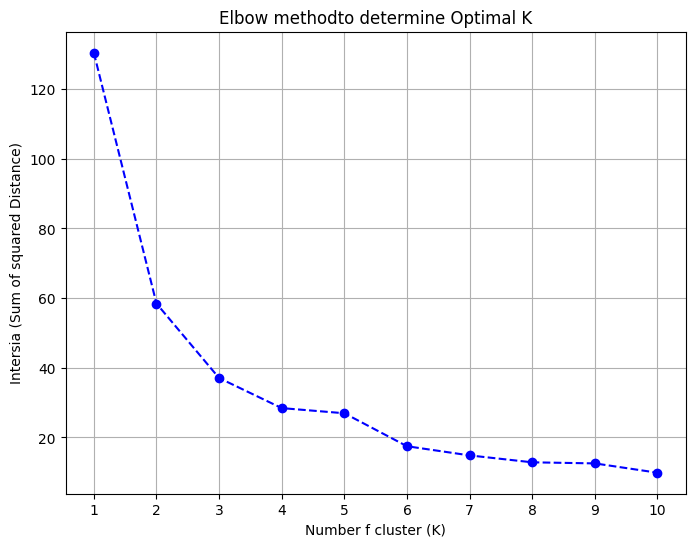

In [21]:
inertia_value = []
k_values = range(1,11)


for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(X)
    inertia_value.append(kmeans.inertia_)

    
plt.figure(figsize=(8,6))
plt.plot(k_values,inertia_value,marker='o', linestyle='--', color='b')
plt.title("Elbow methodto determine Optimal K")
plt.xlabel("Number f cluster (K)")
plt.ylabel("Intersia (Sum of squared Distance)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

#Compute metrics for the chosen K

chosen_k = 3

kmeans = KMeans(n_clusters = chosen_k, random_state=42)

kmeans.fit(X)

# Calculate metrics

silhouette_avg = silhouette_score(X, kmeans.labels_)

# Print metrics:

print(f"silhouette Score: {silhouette_avg:.2f}")

silhouette Score: 0.45
